In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

#**Tipos de Análise Exploratória de Dados**

Neste notebook, vamos explorar diferentes tipos de análise exploratória de dados (EDA - Exploratory Data Analysis). A EDA é uma etapa crucial na análise de dados, que nos permite compreender melhor os conjuntos de dados, identificar padrões, tendências e relações entre as variáveis. Vamos abordar os seguintes tipos de análise:

1. Univariada sem gráficos
2. Univariada gráfica
3. Multivariada sem gráficos
4. Multivariada com gráficos

**1. Univariada sem gráficos:**

A análise univariada sem gráficos é uma forma simples de análise de dados que lida com apenas uma variável. O objetivo principal é descrever os dados e identificar padrões dentro deles. Essa análise não leva em consideração causas ou relacionamentos.

Vamos realizar uma análise univariada sem gráficos em nosso conjunto de dados.

In [ ]:

url_arquivo = "https://huggingface.co/datasets/scikit-learn/iris/raw/main/Iris.csv"

# Carregar os dados
dados = pd.read_csv(url_arquivo)

# Verificar o nome das colunas
print(dados.columns)

# Escolher a coluna correta para análise univariada (por exemplo, 'SepalLengthCm')
variavel = dados['SepalLengthCm']
estatisticas_descritivas = variavel.describe()

print(estatisticas_descritivas)



Neste exemplo, carregamos os dados de um arquivo CSV e selecionamos uma variável específica para análise. Usamos o método describe() para obter estatísticas descritivas dessa variável, como média, desvio padrão, mínimo, máximo e quartis.


**2. Univariada gráfica**

A análise univariada gráfica complementa a análise univariada sem gráficos, fornecendo uma visão mais completa dos dados. Vamos explorar alguns tipos comuns de gráficos para análise univariada:

*   Tabelas cruzadas: Mostram os valores dos dados e a distribuição.

*   Histogramas: Gráficos de colunas que representam a frequência ou proporção de casos em intervalos de valores.

*   Diagramas de caixa: Exibem graficamente os cinco números resumidos (mínimo, primeiro quartil, mediana, terceiro quartil e máximo).

Vamos usar a biblioteca matplotlib para criar gráficos univariados.

In [ ]:

# Carregar o arquivo CSV para o ambiente do Colab
#uploaded = files.upload()

# Obter o nome do arquivo carregado
url_arquivo = "https://huggingface.co/datasets/scikit-learn/iris/raw/main/Iris.csv"

# Carregar os dados
dados = pd.read_csv(url_arquivo)

# Tabelas cruzadas
tabela_cruzada = pd.crosstab(index=dados['SepalLengthCm'], columns='count')

# Histogramas
plt.hist(dados['SepalLengthCm'], bins=10)
plt.xlabel('SepalLengthCm')
plt.ylabel('Frequência')
plt.title('Histograma da SepalLengthCm')
plt.show()

# Diagrama de caixa
plt.boxplot(dados['SepalLengthCm'])
plt.xlabel('SepalLengthCm')
plt.title('Diagrama de Caixa da SepalLengthCm')
plt.show()



Neste exemplo, usamos a função crosstab do pandas para criar uma tabela cruzada que mostra a contagem dos valores da variável. Em seguida, criamos um histograma e um diagrama de caixa para visualizar a distribuição e os valores discrepantes da variável.

**3. Multivariada sem gráficos**

A análise multivariada lida com conjuntos de dados que envolvem mais de uma variável. Na análise multivariada sem gráficos, exploramos a relação entre duas ou mais variáveis por meio de tabulação cruzada ou estatística.

In [21]:
url_arquivo = "https://huggingface.co/datasets/scikit-learn/iris/raw/main/Iris.csv"

# Carregar os dados
dados = pd.read_csv(url_arquivo)

# Dividir o conjunto de dados em dois subconjuntos
dados_subconjunto1 = dados.sample(frac=0.5, random_state=42)
dados_subconjunto2 = dados.drop(dados_subconjunto1.index)

# Análise multivariada - Contagem de flores de cada espécie em cada subconjunto
contagem_subconjunto1 = dados_subconjunto1['Species'].value_counts()
contagem_subconjunto2 = dados_subconjunto2['Species'].value_counts()

# Exibe a contagem de flores de cada espécie em cada subconjunto
print("Contagem de flores por espécie presente no Subconjunto 1:")
print(contagem_subconjunto1)

print("\nContagem de flores por espécie presente no Subconjunto 2:")
print(contagem_subconjunto2)


Contagem de flores por espécie presente no Subconjunto 1:
Iris-setosa        29
Iris-versicolor    23
Iris-virginica     23
Name: Species, dtype: int64

Contagem de flores por espécie presente no Subconjunto 2:
Iris-versicolor    27
Iris-virginica     27
Iris-setosa        21
Name: Species, dtype: int64


Neste exemplo, usamos a função crosstab do pandas para criar uma tabela cruzada que mostra a relação entre duas variáveis. Também é possível usar o método groupby para agrupar as variáveis e calcular estatísticas resumidas. De forma resumida, ele interpreta 2 colunas dentre as disponíveis e faz uma análise de quais tipos de plantas existem(sem uma interpretação gráfica).


**4. Multivariada com gráficos**

A análise multivariada com gráficos nos permite visualizar as relações entre dois ou mais conjuntos de dados. Um gráfico comumente utilizado é o gráfico de colunas agrupadas, onde cada grupo representa um nível de uma variável e cada coluna dentro de um grupo representa os níveis de outra variável.

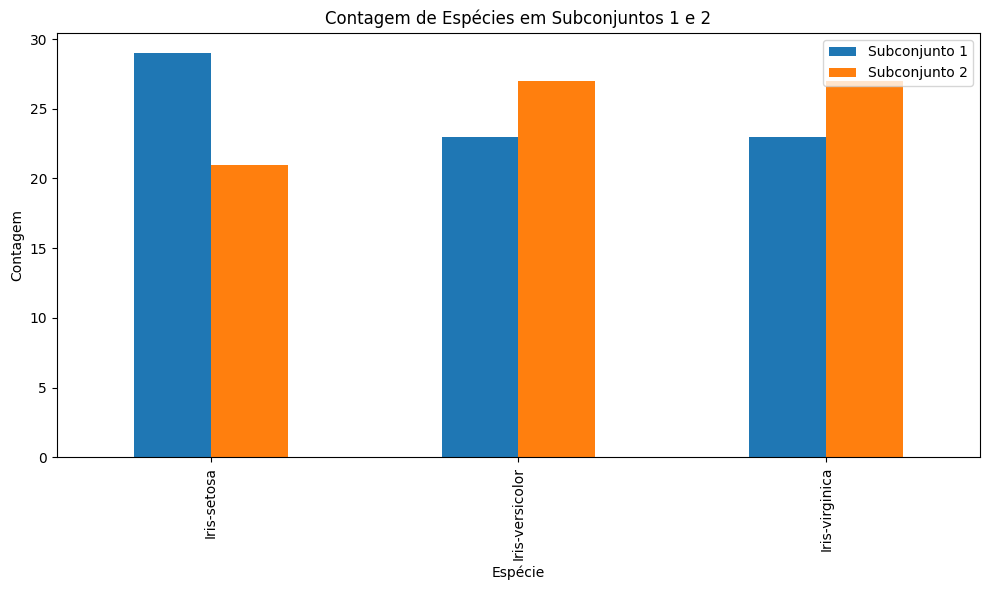

In [20]:
url_arquivo = "https://huggingface.co/datasets/scikit-learn/iris/raw/main/Iris.csv"

# Carregar os dados
dados = pd.read_csv(url_arquivo)

# Dividir o conjunto de dados em dois subconjuntos aleatórios
dados_subconjunto1 = dados.sample(frac=0.5, random_state=42)
dados_subconjunto2 = dados.drop(dados_subconjunto1.index)

# Calcular a contagem de flores de cada espécie em cada subconjunto
contagem_subconjunto1 = dados_subconjunto1['Species'].value_counts()
contagem_subconjunto2 = dados_subconjunto2['Species'].value_counts()

# Combinar as contagens dos subconjuntos em um único DataFrame
contagem_combinada = pd.concat([contagem_subconjunto1, contagem_subconjunto2], axis=1)
contagem_combinada.columns = ['Subconjunto 1', 'Subconjunto 2']

# Criar o gráfico de colunas agrupadas para visualizar as contagens de cada espécie em ambos os subconjuntos
fig, ax = plt.subplots(figsize=(10, 6))

contagem_combinada.plot(kind='bar', ax=ax)
ax.set_xlabel('Espécie')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de Espécies em Subconjuntos 1 e 2')

plt.tight_layout()
plt.show()


Neste exemplo, usamos o método groupby para agrupar as variáveis e criar um gráfico de colunas agrupadas. Isso nos permite visualizar a relação entre as variáveis e comparar os níveis de uma variável com os níveis de outra. De forma resumida, ele interpreta 2 colunas dentre as disponíveis(nesse caso diferentes espécies de plantas e faz uma contagem dos tipos, logo após essa contagem demonstra a forma gráfica).

**Importância:**

1. Diversidade de técnicas: Diferentes tipos de análise exploratória usam abordagens variadas, como estatísticas descritivas, gráficos, visualizações, análise de clusters, análise de componentes principais, entre outras. Cada técnica fornece uma perspectiva única dos dados, permitindo uma compreensão mais completa do conjunto de dados.

2. Exploração abrangente: A variedade de técnicas de análise exploratória permite explorar os dados de várias maneiras, revelando padrões ocultos ou tendências que podem não ser evidentes em uma única abordagem.


Em resumo, ter diferentes tipos de análise exploratória de dados é fundamental para obter uma compreensão completa dos dados, detectar padrões importantes e insights valiosos, além de validar suposições iniciais. Essa diversidade de técnicas ajuda a tornar a análise de dados mais abrangente e eficiente, permitindo que os analistas tomem decisões informadas e precisas com base nos dados disponíveis.


#**Bibliografia**

**Livros:**

*   "An Introduction to Statistical Learning" de Gareth James, Daniela Witten, Trevor Hastie, e Robert Tibshirani".

*   "Python for Data Analysis" de Wes McKinney".

**Sites**

*   https://www.ibm.com/br-pt/topics/exploratory-data-analysis